In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import sys
import numpy as np
import cugraph as cg
import cudf, cuml
import pandas as pd
import cupy as cp

In [2]:
# maxInt = sys.maxsize
# while True:
#     # decrease the maxInt value by factor 10
#     # as long as the OverflowError occurs.
#     try:
#         csv.field_size_limit(maxInt)
#         break
#     except OverflowError:
#         maxInt = int(maxInt/10)

In [3]:
# Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category

#Read Data from csv
# filename = "./data/Data_API.csv"
# with open(filename,'r', encoding='UTF-8') as f:
#      reader = csv.reader(f)
#      header = next(reader)
#      seller_address_list = []
#      buyer_address_list = []
#      category_list=[]
#      for row in reader:
#          seller_address_list.append(row[3])
#          buyer_address_list.append(row[5])
#          category_list.append(row[23])
# edge_list = list(zip(seller_address_list, buyer_address_list))

In [4]:
labels=['Art','Collectible','Games','Metaverse','Utility','Other']

In [5]:
paths={
    # "Data API":"./data/Data_API_mapped.csv",
    "Art":"./data/Art_mapped.csv",
    "Collectible":"./data/Collectible_mapped.csv",
    "Games":"./data/Games_mapped.csv",
    "Metaverse":"./data/Metaverse_mapped.csv",
    "Utility":"./data/Utility_mapped.csv",
    "Other":"./data/Other_mapped.csv"
    }

In [6]:
df_list=[]
for key in paths:
    df=cudf.read_csv(paths[key])
    df=df.iloc[:,0:2]
    df.columns = ["Seller","Buyer"]
    print(df.head())
    df_list.append(df)

   Seller  Buyer
0       2      3
1       2      4
2       5      6
3       7      8
4       5      9
   Seller  Buyer
0       0      1
1       0      1
2       2      3
3       4      5
4       3      6
   Seller  Buyer
0       0      2
1       0      1
2       0      2
3       0      2
4       0      2
   Seller  Buyer
0       2      1
1       3      1
2       4      1
3       5      1
4       6      1
   Seller  Buyer
0       2      3
1       4      5
2       4      0
3       4      0
4       4      6
   Seller  Buyer
0       2      3
1       2      1
2       4      5
3       6      7
4       6      8


In [7]:
num_nodes_list=[]
num_edges_list=[]
graphs=[]
for i,label in enumerate(labels):
    G = cg.MultiGraph()
    df=df_list[i]
    G.from_cudf_edgelist(df, source="Seller", destination="Buyer")
    graphs.append(G)
    #Ouput the number of nodes and edges
    print("----{}----".format(label))
    nodes = G.number_of_nodes()
    num_nodes_list.append(nodes)
    edges = G.number_of_edges()
    num_edges_list.append(edges)
    print("Number of nodes and edges: ",nodes,"  ",edges)

----Art----
Number of nodes and edges:  161260    1377796
----Collectible----
Number of nodes and edges:  92243    1589742
----Games----
Number of nodes and edges:  282915    2271523
----Metaverse----
Number of nodes and edges:  18330    62524
----Utility----
Number of nodes and edges:  3459    7798
----Other----
Number of nodes and edges:  48300    272704


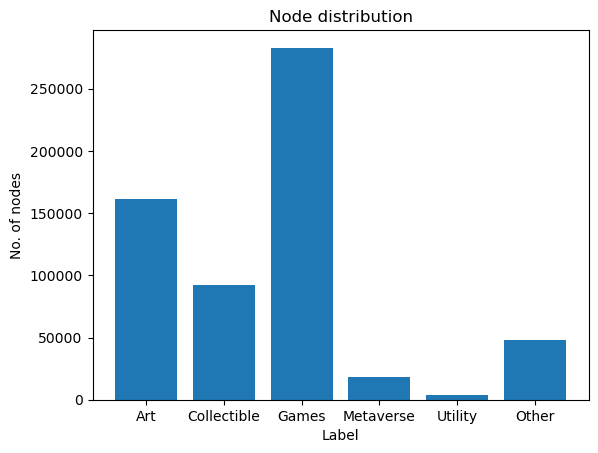

In [8]:
plt.bar(labels, num_nodes_list)
plt.title('Node distribution')
plt.xlabel('Label')
plt.ylabel('No. of nodes')
plt.show()

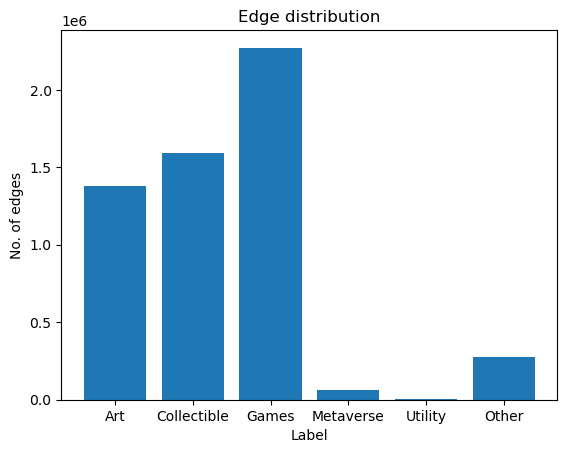

In [9]:
plt.bar(labels, num_edges_list)
plt.title('Edge distribution')
plt.xlabel('Label')
plt.ylabel('No. of edges')
plt.show()

In [13]:
avg_in_degree_list=[]
avg_out_degree_list=[]
avg_degree_list=[]
list_of_degree_list=[]

for i,graph in enumerate(graphs):
    sum_of_in_degree=0
    sum_of_out_degree=0
    degree_list=[]
    for j,node in enumerate(graph.nodes().to_numpy()):
        temp_in=graph.in_degree(node).to_numpy()[0][1]
        temp_out=graph.out_degree(node).to_numpy()[0][1]
        sum_of_in_degree+=temp_in
        sum_of_out_degree+=temp_out

        degree_list.append(temp_in+temp_out)
        if j%1000==0:
            print('----{} nodes----'.format(j))

    divisor=num_nodes_list[i]
    avg_out_degree=sum_of_out_degree/divisor
    avg_in_degree=sum_of_in_degree/divisor
    avg_degree=(sum_of_in_degree+sum_of_out_degree)/divisor

    print("Category: {}".format(labels[i]))
    print("Average in-degree: ",avg_in_degree)
    avg_in_degree_list.append(avg_in_degree)

    print("Average out-degree: ",avg_out_degree)
    avg_out_degree_list.append(avg_out_degree)

    print("Average degree: ",avg_degree)
    avg_degree_list.append(avg_degree)
    degree_list=cp.array(degree_list)
    list_of_degree_list.append(degree_list)


----0 nodes----
----1000 nodes----
----2000 nodes----
----3000 nodes----
----4000 nodes----
----5000 nodes----
----6000 nodes----
----7000 nodes----
----8000 nodes----
----9000 nodes----
----10000 nodes----
----11000 nodes----
----12000 nodes----
----13000 nodes----
----14000 nodes----
----15000 nodes----
----16000 nodes----
----17000 nodes----
----18000 nodes----
----19000 nodes----
----20000 nodes----
----21000 nodes----
----22000 nodes----
----23000 nodes----
----24000 nodes----
----25000 nodes----
----26000 nodes----
----27000 nodes----
----28000 nodes----
----29000 nodes----
----30000 nodes----
----31000 nodes----
----32000 nodes----
----33000 nodes----
----34000 nodes----
----35000 nodes----
----36000 nodes----
----37000 nodes----
----38000 nodes----
----39000 nodes----
----40000 nodes----
----41000 nodes----
----42000 nodes----
----43000 nodes----
----44000 nodes----
----45000 nodes----
----46000 nodes----
----47000 nodes----
----48000 nodes----
----49000 nodes----
----50000 nod

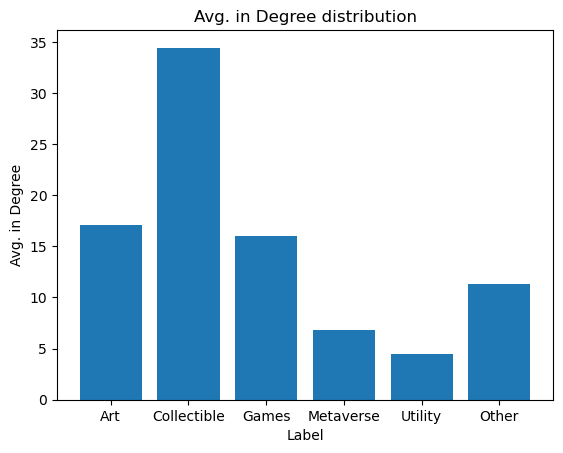

In [14]:
plt.bar(labels, avg_in_degree_list)
plt.title('Avg. in Degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. in Degree')
plt.show()

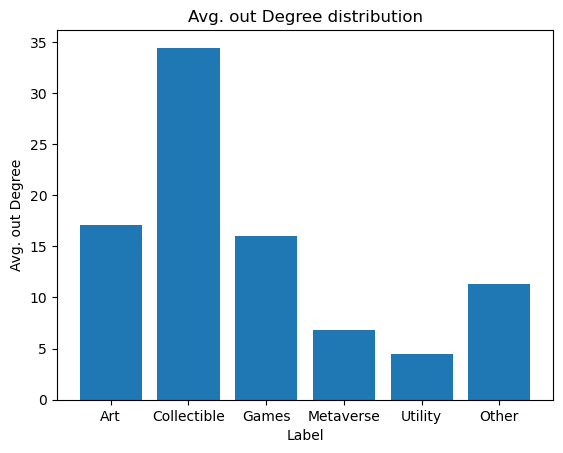

In [15]:
plt.bar(labels, avg_out_degree_list)
plt.title('Avg. out Degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. out Degree')
plt.show()

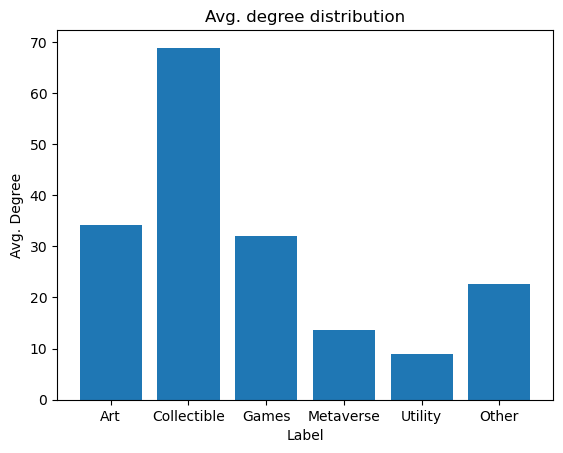

In [16]:
plt.bar(labels, avg_degree_list)
plt.title('Avg. degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. Degree')
plt.show()

Text(0, 0.5, 'Count,P(K)*n')

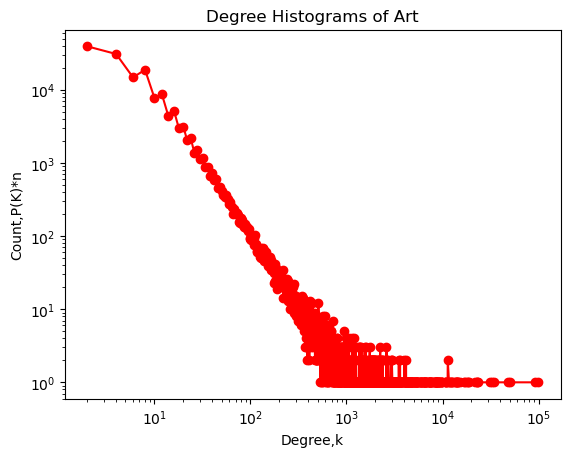

In [31]:
from collections import Counter
degree_list=list_of_degree_list[0]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[0]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

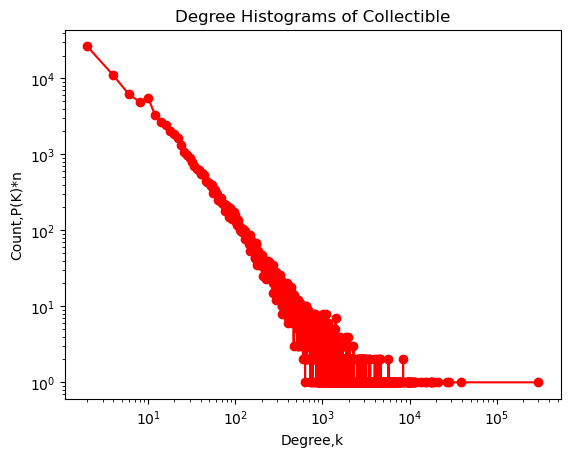

In [32]:
degree_list=list_of_degree_list[1]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[1]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

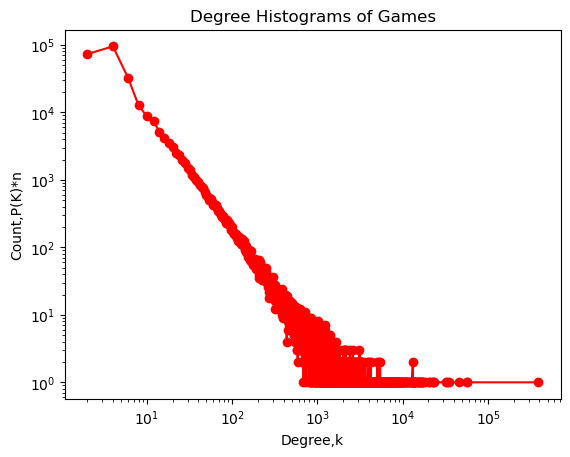

In [33]:
degree_list=list_of_degree_list[2]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[2]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

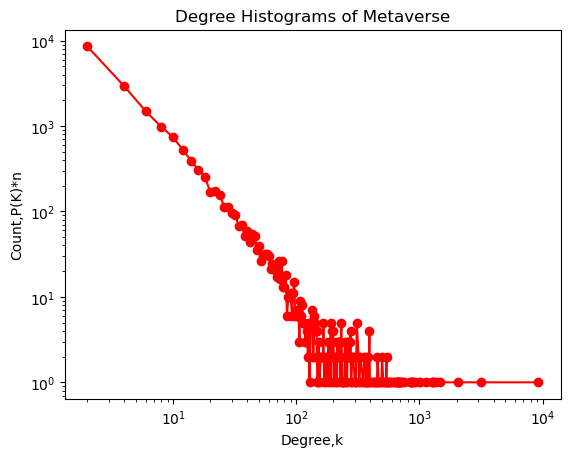

In [34]:
degree_list=list_of_degree_list[3]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[3]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

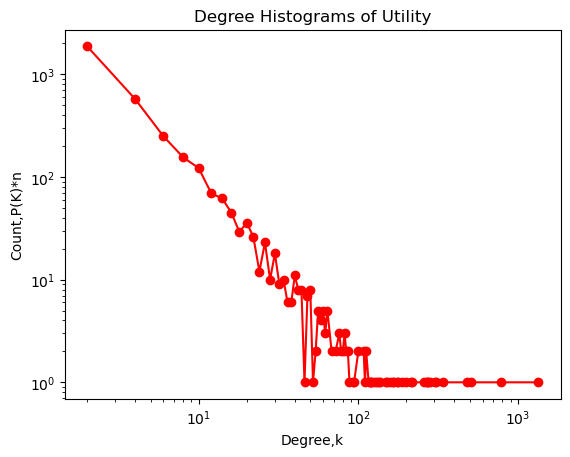

In [35]:
degree_list=list_of_degree_list[4]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[4]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

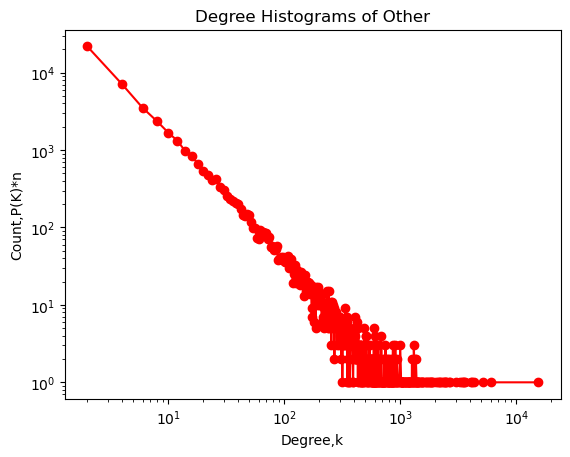

In [36]:
degree_list=list_of_degree_list[5]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[5]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
-----4000 node----
-----5000 node----
-----6000 node----
-----7000 node----
-----8000 node----
-----9000 node----
-----10000 node----
-----11000 node----
-----12000 node----
-----13000 node----
-----14000 node----
-----15000 node----
-----16000 node----
-----17000 node----
-----18000 node----
-----19000 node----
-----20000 node----
-----21000 node----
-----22000 node----
-----23000 node----
-----24000 node----
-----25000 node----
-----26000 node----
-----27000 node----
-----28000 node----
-----29000 node----
-----30000 node----
-----31000 node----
-----32000 node----
-----33000 node----
-----34000 node----
-----35000 node----
-----36000 node----
-----37000 node----
-----38000 node----
-----39000 node----
-----40000 node----
-----41000 node----
-----42000 node----
-----43000 node----
-----44000 node----
-----45000 node----
-----46000 node----
-----47000 node----
-----48000 node----
-----49000 node----
-----50000 no

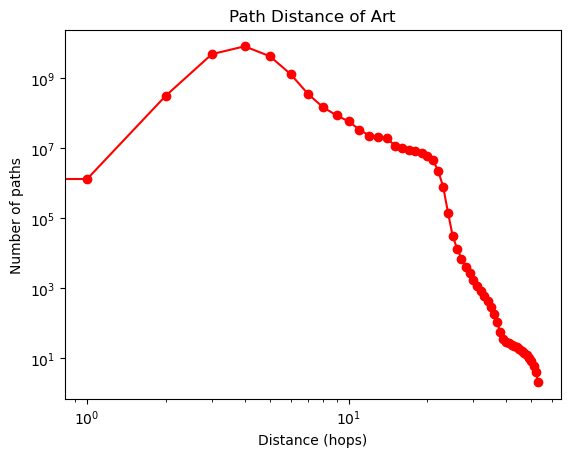

In [14]:
# compute distance
from collections import Counter
k=0
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
-----4000 node----
-----5000 node----
-----6000 node----
-----7000 node----
-----8000 node----
-----9000 node----
-----10000 node----
-----11000 node----
-----12000 node----
-----13000 node----
-----14000 node----
-----15000 node----
-----16000 node----
-----17000 node----
-----18000 node----
-----19000 node----
-----20000 node----
-----21000 node----
-----22000 node----
-----23000 node----
-----24000 node----
-----25000 node----
-----26000 node----
-----27000 node----
-----28000 node----
-----29000 node----
-----30000 node----
-----31000 node----
-----32000 node----
-----33000 node----
-----34000 node----
-----35000 node----
-----36000 node----
-----37000 node----
-----38000 node----
-----39000 node----
-----40000 node----
-----41000 node----
-----42000 node----
-----43000 node----
-----44000 node----
-----45000 node----
-----46000 node----
-----47000 node----
-----48000 node----
-----49000 node----
-----50000 no

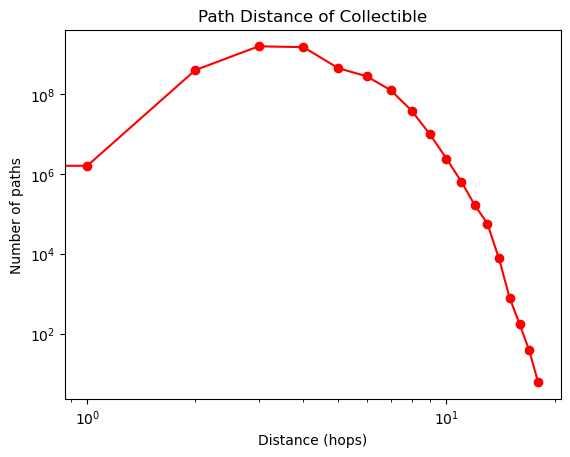

In [15]:
# compute distance
from collections import Counter
k=1
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
-----4000 node----
-----5000 node----
-----6000 node----
-----7000 node----
-----8000 node----
-----9000 node----
-----10000 node----
-----11000 node----
-----12000 node----
-----13000 node----
-----14000 node----
-----15000 node----
-----16000 node----
-----17000 node----
-----18000 node----
-----19000 node----
-----20000 node----
-----21000 node----
-----22000 node----
-----23000 node----
-----24000 node----
-----25000 node----
-----26000 node----
-----27000 node----
-----28000 node----
-----29000 node----
-----30000 node----
-----31000 node----
-----32000 node----
-----33000 node----
-----34000 node----
-----35000 node----
-----36000 node----
-----37000 node----
-----38000 node----
-----39000 node----
-----40000 node----
-----41000 node----
-----42000 node----
-----43000 node----
-----44000 node----
-----45000 node----
-----46000 node----
-----47000 node----
-----48000 node----
-----49000 node----
-----50000 no

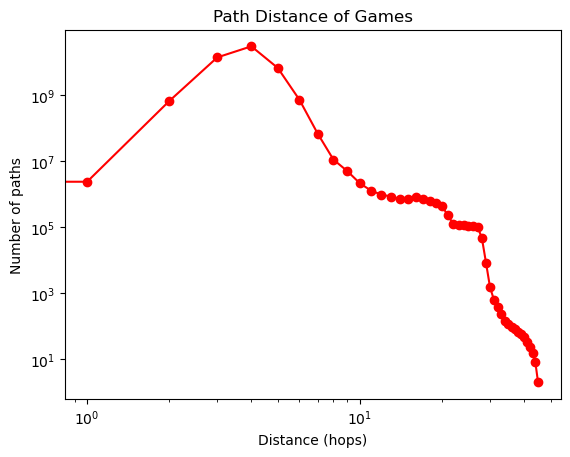

In [16]:
# compute distance
from collections import Counter
k=2
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
-----4000 node----
-----5000 node----
-----6000 node----
-----7000 node----
-----8000 node----
-----9000 node----
-----10000 node----
-----11000 node----
-----12000 node----
-----13000 node----
-----14000 node----
-----15000 node----
-----16000 node----
-----17000 node----
-----18000 node----
4.63781116531576


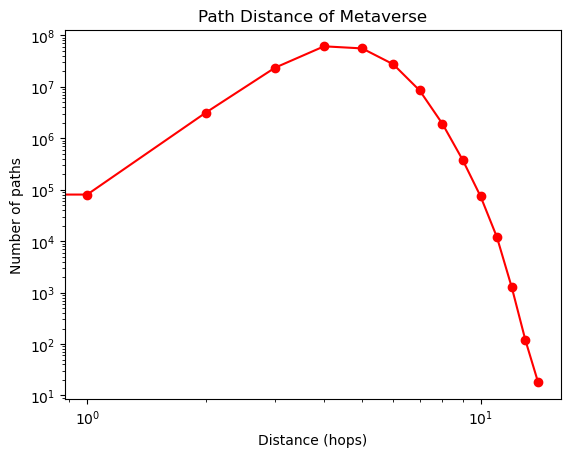

In [17]:
# compute distance
from collections import Counter
k=3
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
6.22138679038831


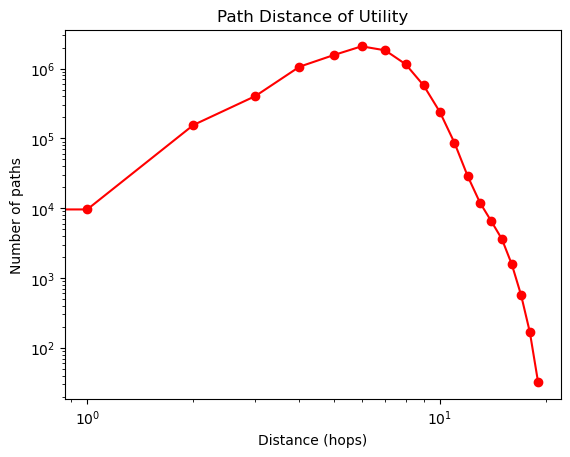

In [13]:
# compute distance
from collections import Counter
k=4
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

-----0 node----
-----1000 node----
-----2000 node----
-----3000 node----
-----4000 node----
-----5000 node----
-----6000 node----
-----7000 node----
-----8000 node----
-----9000 node----
-----10000 node----
-----11000 node----
-----12000 node----
-----13000 node----
-----14000 node----
-----15000 node----
-----16000 node----
-----17000 node----
-----18000 node----
-----19000 node----
-----20000 node----
-----21000 node----
-----22000 node----
-----23000 node----
-----24000 node----
-----25000 node----
-----26000 node----
-----27000 node----
-----28000 node----
-----29000 node----
-----30000 node----
-----31000 node----
-----32000 node----
-----33000 node----
-----34000 node----
-----35000 node----
-----36000 node----
-----37000 node----
-----38000 node----
-----39000 node----
-----40000 node----
-----41000 node----
-----42000 node----
-----43000 node----
-----44000 node----
-----45000 node----
-----46000 node----
-----47000 node----
-----48000 node----
4.837817800418493


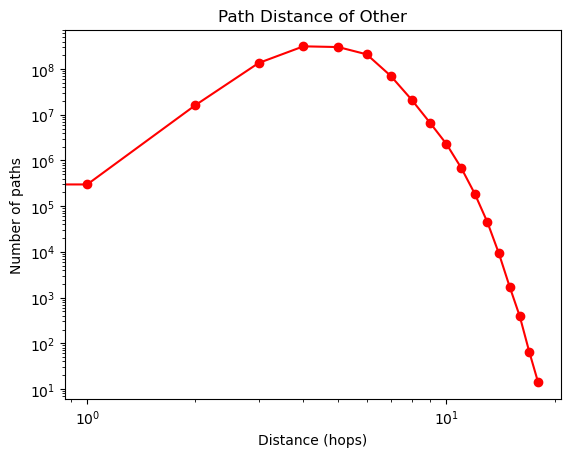

In [18]:
# compute distance
from collections import Counter
k=5
graph = graphs[k]
total_dis=0
len_dis=0
counter=Counter([])
for i, node in enumerate(graph.nodes().to_numpy()):
    path_len = cg.sssp(graph, source=node)
    dis_seq=path_len['distance'].to_numpy()
    dis_seq=dis_seq[dis_seq<10**10]
    counter.update(dis_seq)
    total_dis+=sum(dis_seq)
    len_dis+=len(dis_seq)

    if i % 1000 == 0:
        print("-----{} node----".format(i))

dis_freq = [counter.get(d,0) for d in range(int(max(counter))+1)]
dis = range(len(dis_freq))

#log-log
plt.title("Path Distance of {}".format(labels[k]))
plt.loglog(dis, dis_freq, 'ro-')
plt.xlabel('Distance (hops)')
plt.ylabel('Number of paths')
#Calculate average path
avg_path = total_dis / (len_dis- num_nodes_list[k])
print(avg_path)

In [12]:
for i,graph in enumerate(graphs):
    degree_centrality = cg.degree_centrality(graph)
    degree_centrality.to_csv("./result/degree_centrality_{}.csv".format(labels[i]),index=False)
    print("Degree centrality for {}: {}".format(labels[i],degree_centrality))

Degree centrality for Art:         vertex  degree_centrality
0            0           0.000174
1            1           0.003101
2            2           0.003076
3            3           0.006548
4            4           0.000781
...        ...                ...
161255  161255           0.000012
161256  161256           0.000012
161257  161257           0.000012
161258  161258           0.000012
161259  161259           0.000012

[161260 rows x 2 columns]
Degree centrality for Collectible:        vertex  degree_centrality
0           0           0.037098
1           1           0.005616
2           2           0.000043
3           3           0.114525
4           4           0.007784
...       ...                ...
92238   92238           0.000087
92239   92239           0.000043
92240   92240           0.000022
92241   92241           0.000022
92242   92242           0.000022

[92243 rows x 2 columns]
Degree centrality for Games:         vertex  degree_centrality
0            0    

In [13]:
for i,graph in enumerate(graphs):
    betweenness_centrality = cg.betweenness_centrality(graph)
    betweenness_centrality.to_csv("./result/betweenness_centrality_{}.csv".format(labels[i]),index=False)
    print("Betweenness centrality for {}: {}".format(labels[i],betweenness_centrality))

Betweenness centrality for Art:         vertex  betweenness_centrality
0        66401                0.054546
1         4478                0.067135
2        47094                0.016982
3        81673                0.015890
4         2892                0.095053
...        ...                     ...
161255  161255                0.000000
161256  161256                0.000000
161257  161257                0.000000
161258  161258                0.000000
161259  161259                0.000000

[161260 rows x 2 columns]
Betweenness centrality for Collectible:        vertex  betweenness_centrality
0       61298                0.102769
1        8860                0.031571
2           9                0.004593
3         458                0.008296
4        4414                0.005889
...       ...                     ...
92238   92235                0.000000
92239   92236                0.000000
92240   92240                0.000000
92241   92241                0.000000
92242   92242  

In [14]:
for i,graph in enumerate(graphs):
    edge_betweenness_centrality = cg.edge_betweenness_centrality(graph)
    edge_betweenness_centrality.to_csv("./result/edge_betweenness_centrality_{}.csv".format(labels[i]),index=False)
    print("Edge betweenness centrality for {}: {}".format(labels[i],edge_betweenness_centrality))

Edge betweenness centrality for Art:            src     dst  betweenness_centrality
0       145211  151895            1.046074e-07
1         1611   52511            5.909452e-06
2        34125   52164            5.090752e-06
3       102568  106976            3.591462e-08
4        12858   25026            3.128295e-07
...        ...     ...                     ...
659469     343   56069            1.255978e-06
659470   21539   56368            3.665786e-08
659471     476   59150            1.083515e-05
659472  103076  103854            6.985763e-08
659473  130779  132385            6.788100e-06

[659474 rows x 3 columns]
Edge betweenness centrality for Collectible:           src    dst  betweenness_centrality
0        8978  31508            6.183312e-06
1        7914  19416            3.115397e-06
2       61433  61648            2.713182e-09
3        1395   5630            8.934448e-07
4         268  32349            1.684797e-06
...       ...    ...                     ...
802801   680

In [15]:
num_nodes_list_directed=[]
num_edges_list_directed=[]
graphs_directed=[]
for i,label in enumerate(labels):
    G = cg.Graph(directed=True)
    df=df_list[i]
    G.from_cudf_edgelist(df, source="Seller", destination="Buyer")
    graphs_directed.append(G)
    #Ouput the number of nodes and edges
    print("----{}----".format(label))
    nodes = G.number_of_nodes()
    num_nodes_list.append(nodes)
    edges = G.number_of_edges()
    num_edges_list.append(edges)
    print("Number of nodes and edges: ",nodes,"  ",edges)

----Art----
Number of nodes and edges:  161260    667874
----Collectible----
Number of nodes and edges:  92243    813997
----Games----
Number of nodes and edges:  282915    1208707
----Metaverse----
Number of nodes and edges:  18330    40515
----Utility----
Number of nodes and edges:  3459    4819
----Other----
Number of nodes and edges:  48300    150389


In [16]:
for i,graph in enumerate(graphs_directed):
    eigen_centrality = cg.eigenvector_centrality(graph,max_iter=10000)
    eigen_centrality.to_csv("./result/eigen_centrality_{}.csv".format(labels[i]),index=False)
    print("Eigenvector centrality: for {}: {}".format(labels[i], eigen_centrality))

Eigenvector centrality: for Art:         vertex  eigenvector_centrality
0        14627                0.042231
1         6757                0.115853
2        14403                0.031408
3          692                0.052554
4         3339                0.095889
...        ...                     ...
161255  161244                0.000000
161256  161246                0.000000
161257  161247                0.000000
161258  161252                0.000000
161259  161259                0.000000

[161260 rows x 2 columns]
Eigenvector centrality: for Collectible:        vertex  eigenvector_centrality
0        8860                0.010349
1        1201                0.045967
2        4414                0.096485
3         458                0.125295
4        4435                0.086091
...       ...                     ...
92238   92172                0.000000
92239   92191                0.000000
92240   92207                0.000000
92241   92222                0.000000
92242   92228

/home/elroy/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/cugraph/centrality/eigenvector_centrality.py:86: UserWarning: Eigenvector centrality expects the 'store_transposed' flag to be set to 'True' for optimal performance during the graph creation
  warnings.warn(warning_msg, UserWarning)
/home/elroy/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/cugraph/centrality/eigenvector_centrality.py:86: UserWarning: Eigenvector centrality expects the 'store_transposed' flag to be set to 'True' for optimal performance during the graph creation
  warnings.warn(warning_msg, UserWarning)
/home/elroy/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/cugraph/centrality/eigenvector_centrality.py:86: UserWarning: Eigenvector centrality expects the 'store_transposed' flag to be set to 'True' for optimal performance during the graph creation
  warnings.warn(warning_msg, UserWarning)
/home/elroy/miniconda3/envs/rapids-23.04/lib/python3.10/site-packages/cugraph/centrality/ei

In [62]:
num_nodes_list_undirected=[]
num_edges_list_undirected=[]
graphs_undirected=[]
for i,label in enumerate(labels):
    df=df_list[i]
    G = nx.from_pandas_edgelist(df.to_pandas(), source="Seller", target="Buyer")

    graphs_undirected.append(G)
    #Ouput the number of nodes and edges
    print("----{}----".format(label))
    nodes = G.number_of_nodes()
    num_nodes_list.append(nodes)
    edges = G.number_of_edges()
    num_edges_list.append(edges)
    print("Number of nodes and edges: ",nodes,"  ",edges)

----Art----
Number of nodes and edges:  161260    659474
----Collectible----
Number of nodes and edges:  92243    802806
----Games----
Number of nodes and edges:  282915    1199361
----Metaverse----
Number of nodes and edges:  18330    40277
----Utility----
Number of nodes and edges:  3459    4806
----Other----
Number of nodes and edges:  48300    149385


0


Text(0, 0.5, 'number of connected components')

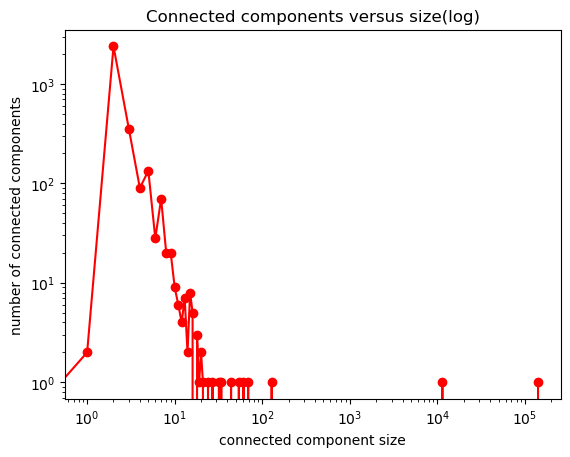

In [64]:
k=0
graph = graphs_undirected[k]
component_list = list(nx.connected_components(graph))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

0


Text(0, 0.5, 'number of connected components')

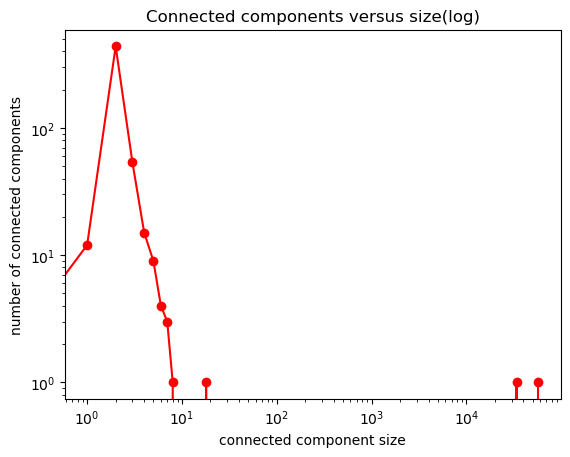

In [65]:
k=1
graph = graphs_undirected[k]
component_list = list(nx.connected_components(graph))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

0


Text(0, 0.5, 'number of connected components')

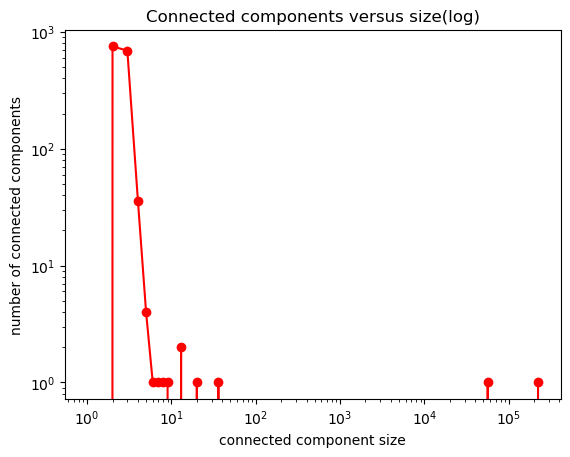

In [66]:
k=2
graph = graphs_undirected[k]
component_list = list(nx.connected_components(graph))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

0


Text(0, 0.5, 'number of connected components')

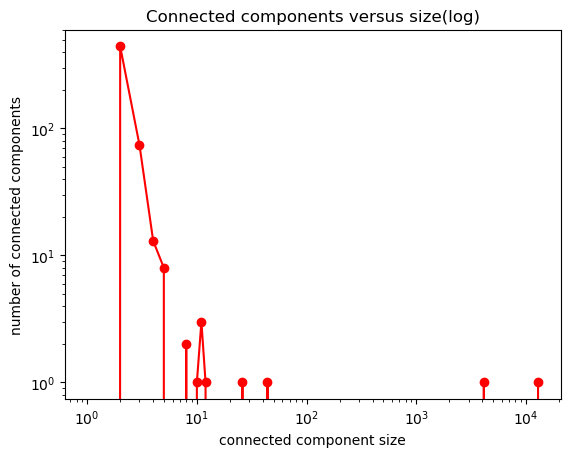

In [67]:
k=3
graph = graphs_undirected[k]
component_list = list(nx.connected_components(graph))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

0


Text(0, 0.5, 'number of connected components')

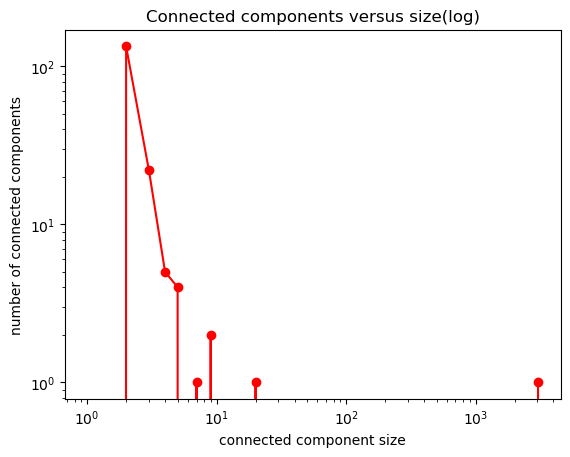

In [68]:
k=4
graph = graphs_undirected[k]
component_list = list(nx.connected_components(graph))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

0


Text(0, 0.5, 'number of connected components')

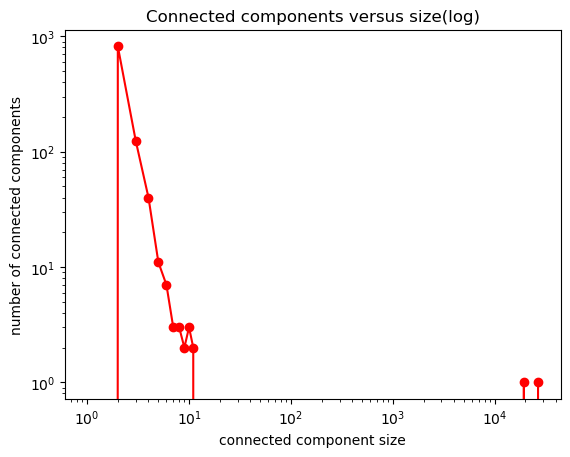

In [69]:
k=5
graph = graphs_undirected[k]
component_list = list(nx.connected_components(graph))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')